# Machine Learning Engineer Nanodegree
## _Unsupervised Learning_
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! 

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# Select three indices of your choice you wish to sample from the dataset
indices = [85, 124, 170]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,36050,1642,2961,4787,500,1621
2,260,8675,13430,1116,7015,323


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

In [4]:
print 'distance from mean'
display(samples - np.round(data.mean()))
print '\nstandard deviations from mean'
display(np.round((samples - np.round(data.mean())) / data.std(), 3))
print '\ndistance from median'
display(samples - np.round(data.median()))
# not as clear what this means...as opposed to std where 95% of data is within 2 std's
print '\nMADs (median absolute deviations) from median'
mad = np.median(np.absolute(data - data.median()), 0)
display(np.round((samples - data.median()) / mad, 3))

distance from mean


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,4117.0,40401.0,84829.0,-2046.0,37946.0,1419.0
1,24050.0,-4154.0,-4990.0,1715.0,-2381.0,96.0
2,-11740.0,2879.0,5479.0,-1956.0,4134.0,-1202.0



standard deviations from mean


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.326,5.474,8.926,-0.421,7.959,0.503
1,1.902,-0.563,-0.525,0.353,-0.499,0.034
2,-0.928,0.390,0.577,-0.403,0.867,-0.426



distance from median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7613.0,42570.0,88024.0,-500.0,40011.0,1978.0
1,27546.0,-1985.0,-1795.0,3261.0,-316.0,655.0
2,-8244.0,5048.0,8674.0,-410.0,6199.0,-643.0



MADs (median absolute deviations) from median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1.286,17.305,28.455,-0.461,55.920,3.104
1,4.653,-0.807,-0.580,3.007,-0.442,1.028
2,-1.393,2.052,2.804,-0.378,8.663,-1.008


**Answer:** The first sample could represent a retail warehouse club store, as it is the maximum in grocery and paper/detergents purhcases and 1/2, 1/3, and 5.5 standard deviations above the mean for deil, fresh, and milk purchases, respectively. People tend to buy a lot of detergents, cleaning supplies, paper, as well as packaged groceries in bulk, and the scale of the purchases place it as a national chain. However, I would expect the frozen purchases to be much higher if this truly represented a retail warehouse store, even if it is just 0.46 MADs less than the median, thus still realitively in the middle of frozen purchases. 

The second sample has heavy fresh purchases, almost 2 standard deviations from the fresh purchases mean, with appreciable but lower purhcases across the other product categories (1/3 and 1/2 standard deviations above mean frozen and deli purchases respectively, and 1/2 standard deviation below mean milk, grocery, and detergents/paper purchases). This sample could represent a large, say regional or national, restaurant chain that focuses on fresh, healthy eating. Such a store would require many fresh fruits and veggies, a lot of meats and frozen purchases (for sides, toppings, and things out of season), but somewhat lower than average milk, packaged groceries, and detegents/paper. 

Finally, the third sample might be a gas station chain. Gas stations are not known for their fresh food offerings (sample 3 being 1 standard deviation below mean), but do stock cold milk and grab-and-go grocercies (.4 and .6 standard deviations above mean, respectively), with perhaps some ice cream--but no frozen dinners--to boot (1/3 standard deviations above mean). Cleaning and other supplies would also be widely available (almost 1 standard deviation above mean), but fresh deli meats would be hard to come by (.4 standard deviations below mean), save perhaps hot dogs. Mmm gas station hot dogs. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

title = 'R^2 score of predicting dropped feature'
print title
print '¯'*len(title)
for col in data.columns:
    # Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(col, axis=1)

    # Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[col], 
                                                        random_state=5, test_size=.25)

    # Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=5).fit(X_train, y_train)

    # Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print '{:{width}} = {: .4f}'.format(col, score, width=max(map(len, data.columns)))

R^2 score of predicting dropped feature
¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯
Fresh            = -0.3434
Milk             = -0.7550
Grocery          =  0.6561
Frozen           = -0.4090
Detergents_Paper =  0.6726
Delicatessen     = -1.2800


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** I originally attempted to predict `Detergents_Paper`, and obtained the prediction score of 0.6726. Curious about the rest of the features, I modified the code and repeated the experiement for every other feature. 

For `Detergents_Paper` and `Grocery`, an R<sup>2</sup> score > 0.65 indicates that, while possibly too low for me personally, the remaining features are tolerably sufficient to predict each dropped feature, and thus the dropped feature is unnecessary for identifying customers' spending habits. _However,_ that does not mean we can drop both features. This only indicates that dropping _one_ of `Detergents_Paper` or `Grocery` is possible. Further investigation would be required to see if we could drop more than one feature at once.

Dropping any of the remaining features--`Fresh`, `Milk`, `Frozen`, and `Delicatessen`--and attempting to predict it generates a model with negative R<sup>2</sup> scores, which means the model failed to predict the feature reliably. The `Delicatessen`-dropped model had an R<sup>2</sup> equal to an impressive -1.28, which shows that it is possibly the most informative feature in the dataset (in my naive estimation).

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

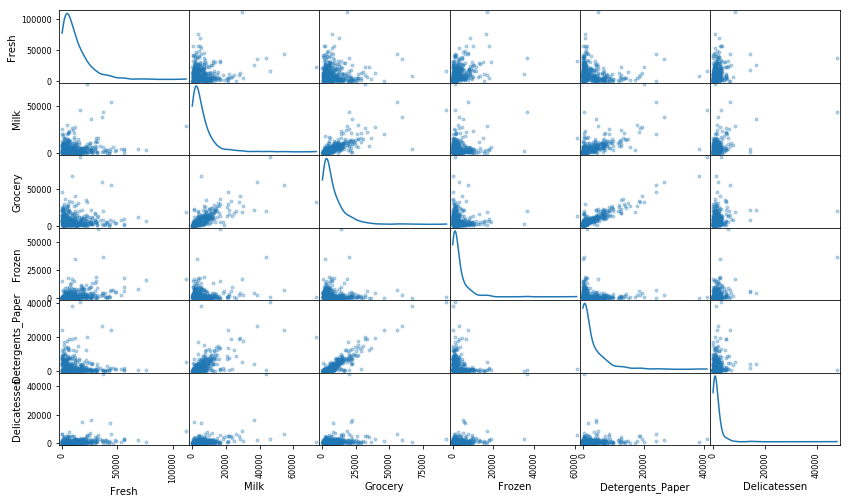

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** I see a strong positive linear correlation between `Detergents_Paper`~`Grocery` and a slightly less strong one between `Detergents_Paper`~`Milk`. `Grocery`~`Milk` could also be tolerably linear. This confirms the suspicisions about the original feature I attempted to predict, `Detergents_Paper`, since its high correlations with `Grocery` and `Milk` means that some combinations of those features could be used to predict it. 

Each feature, when examined solely, has a shifted normal shape to it, with the highest density (the mean if it were symmetrical) occuring less than one-fifth of the way through the data, aka close to 0 with a long tail of larger but less frequent points.  

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

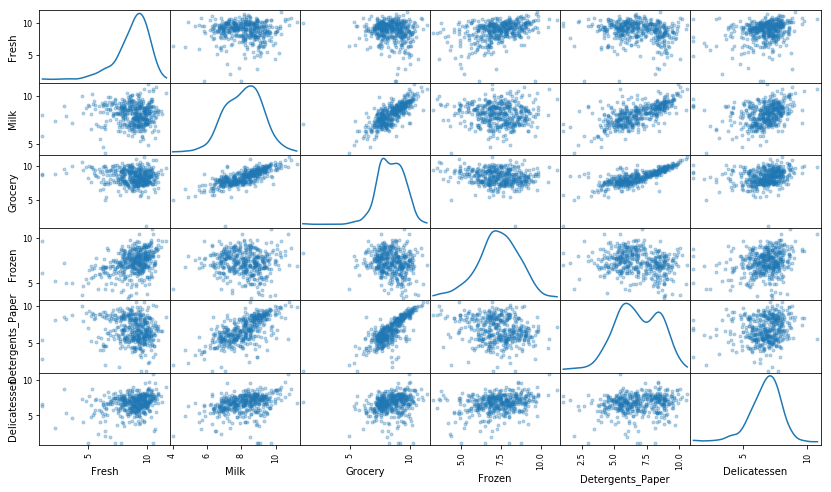

In [7]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
1,10.492662,7.403670,7.993282,8.473659,6.214608,7.390799
2,5.560682,9.068201,9.505246,7.017506,8.855806,5.777652


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [9]:
outlier_by_category = dict()
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*abs(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outlier_data = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(outlier_data)
    
    # Record outlier indices in a set
    outlier_by_category[feature] = set(outlier_data.index.tolist())
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65, 66, 75, 128, 154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [10]:
from itertools import combinations

outliers_in_2_cats = set()
for cat1, cat2 in combinations(log_data.keys(), 2):
    outliers_in_2_cats |= outlier_by_category[cat1].intersection(outlier_by_category[cat2])

outs = sorted(list(outliers_in_2_cats))
print 'The outliers appearing in more than one category are {}'.format(outs)
display(log_data.iloc[outs])

The outliers appearing in more than one category are [65, 66, 75, 128, 154]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** Yes, from the above cell we see that there are 5 data points considered outliers based on the IQR method: indices 65, 66, 75, 128, and 154. I believe that these data points should be removed from the dataset because an outlier in a single category might cluster reasonably with other data in the other four features; however, when a point is an outlier in two categories, it lends more evidence to the fact the data point might be outside the reasonable clusters of the dataset when with all features considered. Such an "outlier cluster" (my wording) of perhaps the single point would mutate the optimal cluster structure, and our analysis would be negatively affected. As a starting point, I added only these data points to the `outliers` list to be removed, for the above reasons. 

Perhaps as analysis progresses, other data points will be added. I will endeavor to update this answer block in that case. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

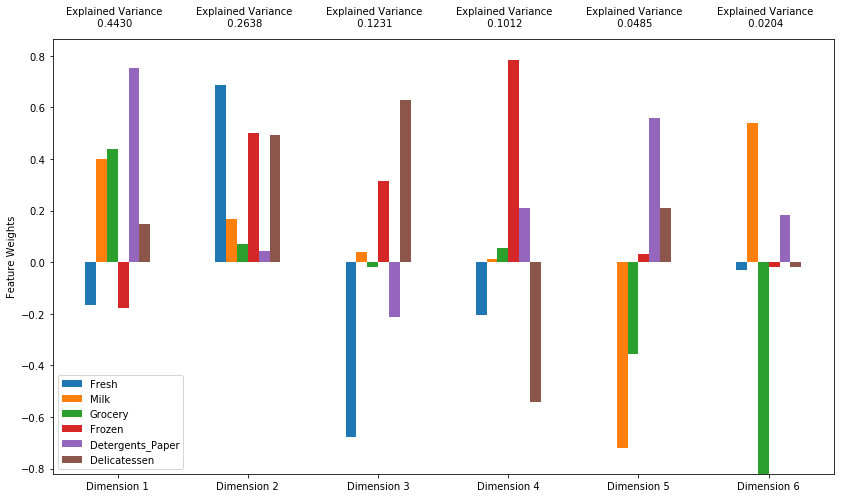

In [11]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA().fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

In [12]:
title = 'Variance in data explained by:'
print title+'\n'+'¯'*len(title)
for num in [2, 4]:
    variance = sum(pca.explained_variance_ratio_[:num])
    print 'First {} principal components ~= {:.2f}%'.format(num, variance*100)

Variance in data explained by:
¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯
First 2 principal components ~= 70.68%
First 4 principal components ~= 93.11%


**Answer:** As seen above, the total variance in the data explained by the first and second principal components is about 71%. Total variance explained by the first four is about 93%. 

The first dimension represents the characteristic of customer spending activity of maximum variance; that is, a new composite feature constructed from our original ones where the variation of customer spending is maximal. This hyperplane cutting through the feature space becomes a new axis that has the best chance at "reconstructing" the data points based upon their projection to that axis. 

In our case, a large positive value of Dimension 1 likely corresponds to a customer buying a lot more of detergents/paper, more but about 1/2 as much milk and groceries, more but 1/6 as much deli products (each relative to the detergents/paper increase), while buying less of fresh and frozen (the reduction equal to about 1/4 the detergents/paper increase). Analogously, a large negative Dimension 1 value corresponds to a large reduction in detergents/paper buying, 1/2 a reduction in milk and grocercies, 1/6 a reduction in deli, and 1/4 an increase in fresh and frozen products (again, each relative to the magntitude of the detergent/paper reduction).

The second dimension is another hyperplane axis orthogonal to the first, but in the direction of next highest variance. PCA guarantees that we step down in explained variance in this way. A high positive Dimension 2 value likely corresponds to a large fresh purchase, about 5/7 as large frozen and deli purchases, 2/7 as large milk, and 1/7 grocery and detergents/paper. A large negative value in Dimension 2 indicates reductions in the above of the same magnitude. 

Continuing to the next orthogonal dimension of highest variance, Dimension 3 admits three roughly inversely proportional relationships of decreasing magnitude: deli vs fresh (1 magnitude), frozen vs detergents/paper (1/2), and the nearly negligible milk vs grocery (1/12). A large positive value of Dimension 3 means that the first feature in each relationship (deli, frozen, milk) is increased while the others are decreased by the same magnitude. A large negative value implies the second feature is increased while the first is decreased. 

Finally, a large positive Dimension 4 value likely corresponds to a large frozen purchase (1 magnitude), somewhat increased detergents/paper (1/4), and slight and negligible increase to groceries and milk, respectively, concurrently with a substantial decrease in deli (5/8) and modest decrease in fresh (1/4). 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [13]:
print('ORIGINAL LOG-DATA SAMPLES')
display(log_samples)

# Display sample log-data after having a PCA transformation applied
print('\nSAMPLE LOG-DATA AFTER PCA TRANSFORM')
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

ORIGINAL LOG-DATA SAMPLES


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
1,10.492662,7.403670,7.993282,8.473659,6.214608,7.390799
2,5.560682,9.068201,9.505246,7.017506,8.855806,5.777652



SAMPLE LOG-DATA AFTER PCA TRANSFORM


,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,5.3316,1.8845,-0.6957,-0.1972,-0.5461,-0.3802
1,-1.3241,1.9242,-0.2657,0.0144,0.5492,-0.2026
2,2.8349,-2.4874,1.0807,1.4123,-0.1096,0.1432


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [14]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(2).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [15]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,5.3316,1.8845
1,-1.3241,1.9242
2,2.8349,-2.4874


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

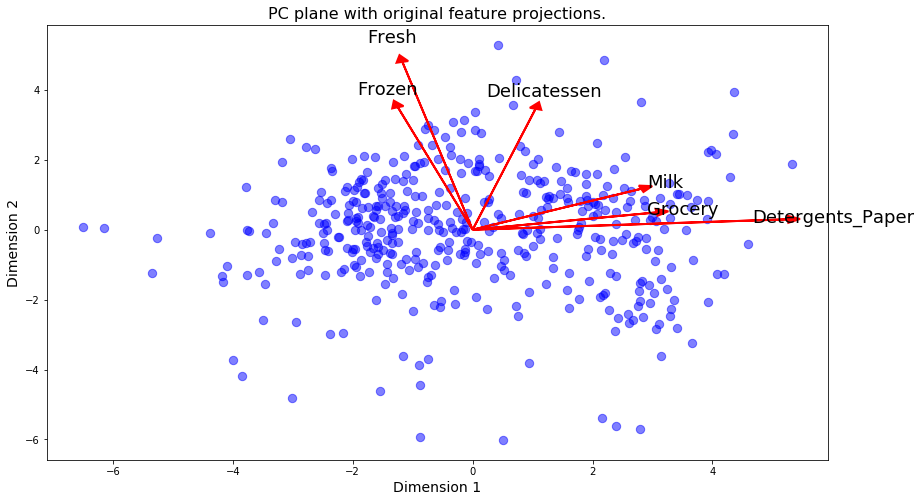

In [16]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** One advantage of k-means clustering is that it is a very scalable algorithm that can accomodate large number of samples. Further, we get a definite answer(/guess) for each data point as to which cluster it belongs to. Finally, it  performs well if the clusters are of the same size and there are not too many clusters, as might be the case here. 

Advantages of using a Gaussian Mixture Model (GMM) include that data points are "soft-assigned" to categories using probabilities. This may be useful here where a customer could dabble in many businesses. Also, clusters in a GMM can accomodate some irregular shapes better than k-means can. 

Intriguingly, from the [sklearn documentation on clustering](http://scikit-learn.org/stable/modules/clustering.html):
> KMeans can be seen as a special case of Gaussian mixture model with equal covariance per component. 

In other words, k-means is biased towards spherical clusters. 

In light of this, since the biplot of the two principle components shows perhaps multiple overlapping irregular clusters (aka no clearly defined or spherical clusters), and because the data is small enough, I will choose to use a GMM clustering algorithm.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [17]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

# range of cluster sizes to test
cluster_range = range(2, 16)

# clusterer and silhouette score storage
storage = pd.DataFrame(columns=['silhouette score', 'clusterer'], index=cluster_range)
storage.index.name = 'clusters'

# cycle through reasonable number of clusters
# will reset desired variable to optimal cluster size in future code block
for n in cluster_range:
    
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = GMM(n_components=n, random_state=5).fit(reduced_data)
    
    # Save clusterer to reduce future computation
    storage.loc[n]['clusterer'] = clusterer

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.means_

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    
    # Record score in DataFrame
    storage.loc[n]['silhouette score'] = score

# Display scores for investigated cluster range and the number of clusters with highest score
display(storage[['silhouette score']])
scores = storage['silhouette score']
optimal_clusters = scores.idxmax()
print 'Maximum silhouette score occurs at {} clusters.'.format(optimal_clusters)

,silhouette score
clusters,
2,0.411819
3,0.371497
4,0.333313
5,0.277007
6,0.285898
7,0.282417
8,0.295477
9,0.300014
10,0.322294


Maximum silhouette score occurs at 2 clusters.


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** See above for the report. Local maximums of silhouette scores were achieved at 2 and 10 clusters, however the best silhouette score occured with 2 clusters. 

In [18]:
# set needed variables to optimal number of clusters as determined above
clusterer = storage.loc[optimal_clusters]['clusterer']
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)
score = scores.loc[optimal_clusters]

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

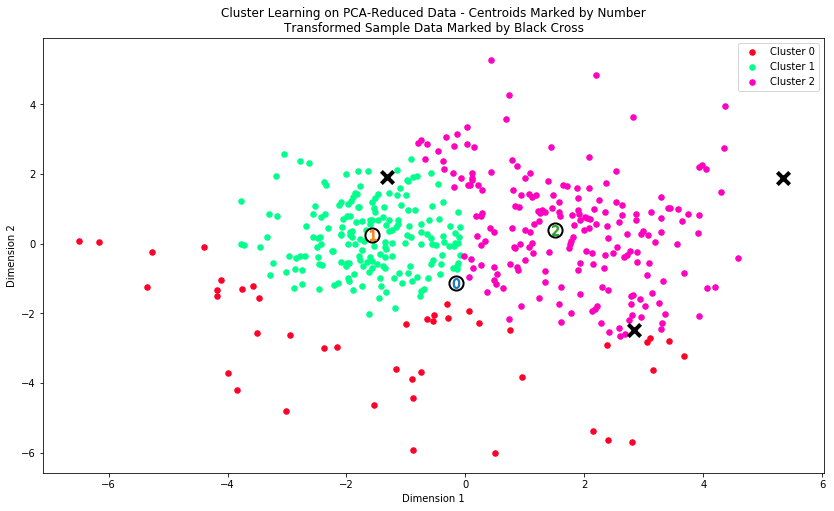

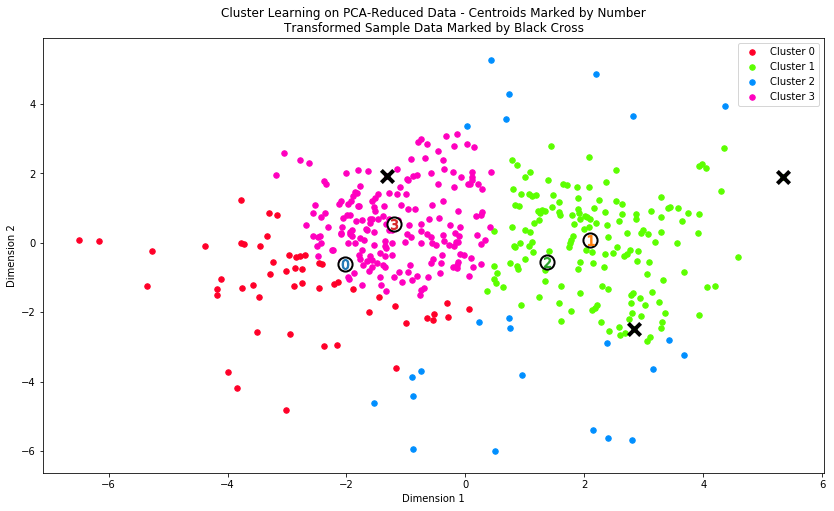

In [19]:
# Interesting sub-optimal-scoring yet informative clustering with possible "outlier cluster(s)"
# Thanks to reviewer Gilad
for n_clusters in [3,4]:
    gmm = storage.loc[n_clusters]['clusterer']
    vs.cluster_results(reduced_data, gmm.predict(reduced_data), gmm.means_, pca_samples)

The graphs above have silhouette scores less than the optimal number of clusters, they still reveal interesting patterns. In Gilad's 3-cluster example, he obtained a cluster with points above and below the 2 main clusters, indicating an outlier cluster of sorts. However, he did not eliminate potential outliers from the start, hence the difference in my visualization of 3 clusters. 

We can still gain insight, though. In the 3-cluster graph, the center of mass of the red dots is above all the points, which are themselves spread throughout the bottom half, while the green and pink clusters are more tightly packed. We could view the green and pink clusters as distinct classes of customers, with the red as a "catch-all" group for customers who don't neatly fit into one or the other, as well as the outliers. The 4-cluster graph continues down this reasoning, with the blue cluster becoming a nice outlier cluster for the green group, while the red cluster becomes an outlier catcher for pink while doubling as possibly a subgroup of the larger pink/red type. 

It's easy to see where this line of reasoning can lead to more and more clusters being explainable and us losing our ability to generalize our model. We will follow with the visualization of the optimal number of clusters by silhouette score and continue our analysis with that model. 

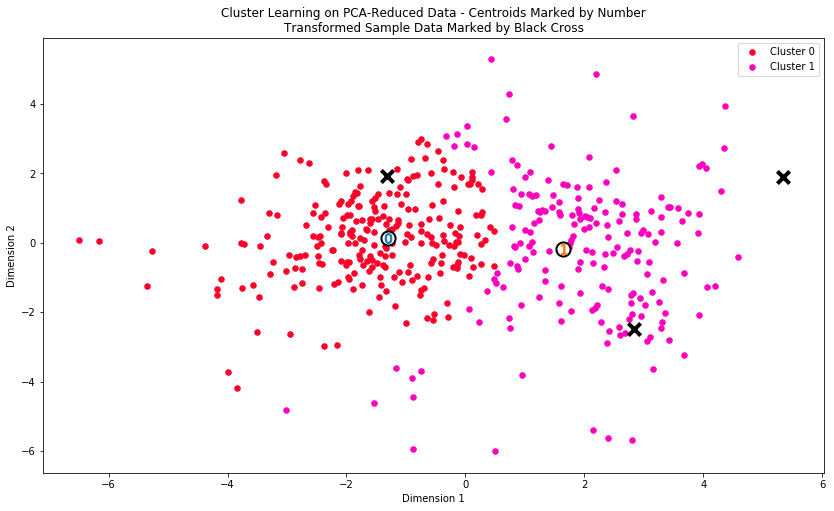

In [20]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [21]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys()).astype(int)
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8812,2052,2689,2058,337,712
Segment 1,4316,6347,9555,1036,3046,945


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8812.0,2052.0,2689.0,2058.0,337.0,712.0
Segment 1,4316.0,6347.0,9555.0,1036.0,3046.0,945.0
50%,8504.0,3627.0,4755.5,1526.0,816.5,965.5


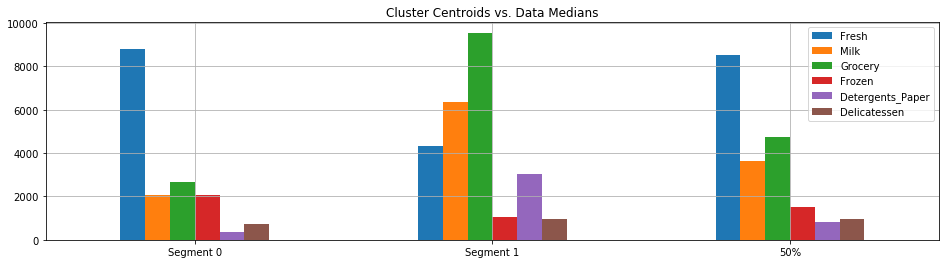

In [22]:
# comparing cluster centers with feature medians
# thanks to reviewer Matt
true_centers_with_median = true_centers.append(data.describe().loc['50%'])
display(true_centers_with_median)
true_centers_with_median.plot(kind='bar', figsize=(16, 4), grid=True, rot=0, sharey=True,
                              title='Cluster Centroids vs. Data Medians');

**Answer:** Judging from the average customer as represented by the cluster centroid Segment 0, a customer assigned to _Cluster 0_ will probably have above median fresh and frozen purchases, below median milk and grocery purchases, and relatively lower deli purchases (though the last point is less determinable). A highly indicative feature is that this customer would have very low detergent/paper purchases. 

Again judging from the cluster centroid Segment 1, a customer assigned to _Cluster 1_ will have much lower than median fresh purchases, less than median frozen purchases, much higher than median milk and grocery purchases, slightly higher deli purchases (again, not so determinable), and most importantly, high detergent/paper purchases. 

In summary, 
* _Cluster 0_ favors fresh and frozen purchases and shuns detergents/paper.
* _Cluster 1_ favors milk, grocery, and detergent/paper purchases.

In my estimation, 
* _Cluster 0_ could represent restaurants
    * Likely to serve fresh foods when possible, but also stock frozen foods for cost savings
    * Relatively less packaged groceries are needed
    * A drawback is that dishwashing soaps for sit-down places and disposable plates/bags for casual establishments should be a large cost  
* _Cluster 1_ could represent grocery stores
    * Obviously offers many groceries
    * Also offers a lot of dairy like milk, yogurt, cheese, etc.
    * Also offers detergents/paper like laundry and diswasher liquid, paper towels, napkins, etc. 

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [23]:
display(samples)
display(true_centers)

# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,36050,1642,2961,4787,500,1621
2,260,8675,13430,1116,7015,323


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8812,2052,2689,2058,337,712
Segment 1,4316,6347,9555,1036,3046,945


Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:** _Sample 0_ has some of the highest purchases in every category: the maximum in grocery and detergent/paper purchases, plus greater than 75th percentile in fresh, milk, and deli categories. The high grocery, milk, and detergent/paper values seem to put closer to _Segment 1_. The prediction for this sample **is** consistent with this. 

_Sample 1_ has high fresh and frozen values, plus lower in detergent/paper. Except for the high deli purchases, this is close to _Segment 0_. The prediction for the this sample **is** consistent with this. 

_Sample 2_ has almost no fresh purchases, but tolerably matches segment 1 in milk, grocery, and frozen, along with having a high detergent/paper value. This makes it reasonably close to _Segment 1_. The prediction for this sample **is** consistent with this. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** In creating customer segments, we are endeavoring to group together customers with similiar buying habits. Therefore, those groups may be reasonably expected to react similiarly to changing conditions. For example, if one segment is produce stands, they might object to not having daily deliveries of fresh goods, whereas a gas station might not care as much about daily deliveries of fruits and veggies, as it is not their main business. 

The wholesale distributor can select a proportion from each customer segment to test the new delivery service on. By examining the resulting change in purchase orders (or from feedback surveys) from a control group in each segment, the distributor can determine who reacted positively and which group(s) to enact the change in delivery service for. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** The question now becomes a classification task admitting a supervisored learning approach. For each customer, the features are the familiar purchase values for each product category, while the target variable is the customer segment assigned to that customer by the GMM algorithm. After fitting a supervised learning model on the original customer data we do have, it becomes a simple matter of calling `.predict(estimated_new_customer_spending)` on the classifier object. In other words, using the newly trained model to classify the new customer. 

However, this approach is a bit redundant, as we already have (in my case) the GMM object trained on the customer data. We could merely call `clusterer.predict(estimated_new_customer_spending)` and obtain a classification. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

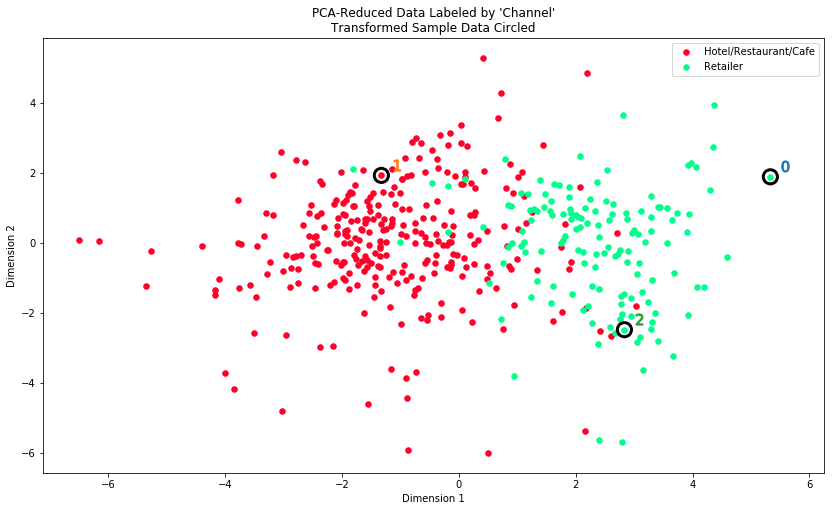

In [24]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** The number of clusters is spot on, there are 2 underlying segments of Hotel/Restaurant/Cafe and Retailer customers, and the optimal number of clusters after running GMM was 2. GMM clustered most of the points correctly, though there is some noise/mixing in the transition zone between Hotel/Restaurant/Cafe and Retailer, with Hotel/Restaurant/Cafe reaching far into the Retailer cluster for `0.5 <= Dimension 1 <= 2`, which is not reflected in my model. 

Yes, there does appear to be clear customer segments looking at the _PCA-Reduced Data Labeled by 'Channel'_, especially when using soft-assignment. While you would have some misclassifications, a line running — in `(Dimension 1, Dimension 2)` terms — `from (0.25, 6) to (1.75, -6)` would neatly divide the data and largely match the clusters generated by my model. 

These classifications are quite consistent with my theorized definitions of the customer segments. By expanding my guess of "restaurants" to include hotels and cafes, and considering "grocery stores" to be representative of retailers in general, you could say that I was fairly accurate. 